## 【問題1】線形回帰のクラスを作成する
- メソッドやパラメータなどはscikit-learnを参考にする
- pyファイルにモジュールとしてまとめる

In [5]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #レコード数の取得
        m = X.shape[0]
        
        #誤差の変数定義
        loss = []
        
        #全レコード分繰り返す
        for i in m:
            #誤差を一行分ずつ追加する
            loss = loss.append((_linear_hypothesis(X[i]) - y[i])**2)
            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print(loss)           
                
        #誤差の合計を計算する
        loss = 0.5 / m *  loss.sum()
        
        return

        
    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        return 
    
    
    def _linear_hypothesis(X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
    
        """
        theta = np.random.randn(X.shape[1])
        return np.dot(X, theta)

    
    def MSE(y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """

        #レコード数の取得
        m = y_pred.shape[0]
        
        #誤差の変数定義
        loss = []
        
        #全レコード分繰り返す
        for i in m:
            #誤差を一行分ずつ追加する
            loss = loss.append(y_pred - y[i])**2)

        #誤差の合計を計算する
        mse = 0.5 / m *  loss.sum()
        return mse
    
    
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値

        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        pass
        return
    
    
        def _gradient_descent(self, X, y):
            """
            説明を記述
            """
            theta = theta - 学習率 / m

## アヤメのデータセットで線形回帰

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model

In [13]:
#Irisデータを読み込む
iris = datasets.load_iris()

In [14]:
#データフレーム作成
df = pd.DataFrame(iris.data, columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#「Name」を追加
df["Name"] = pd.Series(iris.target)

#Nameにirisの種別名を適用していく
df["Name"] = df["Name"].apply(lambda x: iris.target_names[x])

#setosaのがく片と花びらのデータを抽出
setosa = df[df['Name']=='setosa']
X = setosa[["SepalLength"]]
Y = setosa[["SepalWidth"]]

In [15]:
# model = ScratchLinearRegression()
model = linear_model.LinearRegression()

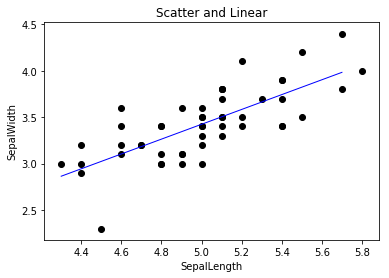

In [27]:
#モデルにデータを学習させる
model.fit(X, Y)

#散布図
plt.scatter(X, Y, color="black")

# #Xの最小値から最大値まで0.1刻み、モデルに合わせてYの値を出力
# #[:,np.newaxis]で2次元データに変換する
px = np.arange(X.min()[0], X.max()[0], 0.1)[:,np.newaxis]
#学習したモデルでpyを出力
py = model.predict(px)

#回帰直線
plt.plot(px, py, color="blue", linewidth=1)

plt.title("Scatter and Linear")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()

In [17]:
print(model.intercept_) #切片=>[-0.62301173]

print(model.coef_) #偏回帰係数（傾き）=>[[ 0.80723367]]

print(model.score(X,Y))#決定係数=>0.557680925892

corr = np.corrcoef(setosa["SepalLength"],setosa["SepalWidth"])
print(corr[0,1])#相関係数=>0.746780373264

[-0.56943267]
[[0.7985283]]
0.5513755803923136
0.7425466856651597
